In [11]:
!pip install pandas numpy scikit-learn matplotlib


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [13]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (2).zip


In [15]:
import zipfile, io

for fn in uploaded:
    if fn.endswith('.zip'):
        z = zipfile.ZipFile(io.BytesIO(uploaded[fn]))
        z.extractall('./data')
        print("Extracted")


Extracted


In [16]:
import os

for root, dirs, files in os.walk('./data'):
    for f in files:
        print(os.path.join(root, f))


./data/store_sales_data (2).csv


In [17]:
df = pd.read_csv('./data/store_sales_data (2).csv')

df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df = df[['Ship Date', 'Sales']].rename(columns={'Ship Date': 'ds', 'Sales': 'y'})
df = df.dropna()
df = df.sort_values('ds')
df = df.groupby('ds')['y'].sum().reset_index()

df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1832 non-null   datetime64[ns]
 1   y       1832 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.8 KB


(          ds           y
 0 2019-01-02   244120.20
 1 2019-01-03   422428.97
 2 2019-01-04   362436.70
 3 2019-01-05   803375.46
 4 2019-01-06  1000057.35,
 None)

In [18]:
df = df.copy()
df['t'] = np.arange(len(df))
df['t2'] = df['t']**2

X = df[['t','t2']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

future_days = 180
future_t = np.arange(len(df), len(df)+future_days)
future_df = pd.DataFrame({'t': future_t, 't2': future_t**2})

future_pred = model.predict(future_df)

forecast_dates = pd.date_range(start=df['ds'].iloc[-1], periods=future_days+1)[1:]
forecast = pd.DataFrame({'ds': forecast_dates, 'yhat': future_pred})

forecast.head()


,ds,yhat
0,2024-01-08,1.350351e+06
1,2024-01-09,1.350287e+06
2,2024-01-10,1.350224e+06
3,2024-01-11,1.350160e+06
4,2024-01-12,1.350096e+06


from matplotlib import pyplot as plt
_df_0['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)

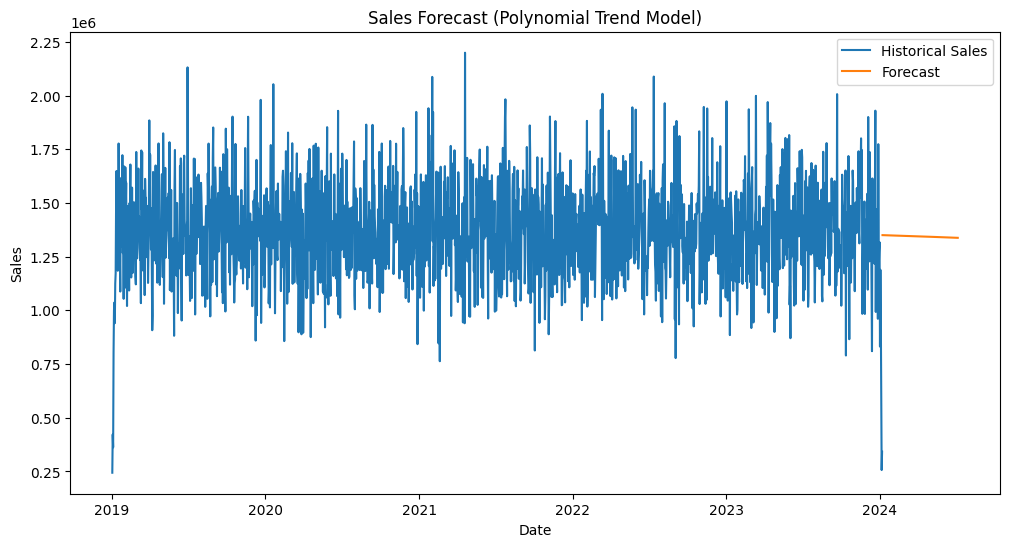

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.title("Sales Forecast (Polynomial Trend Model)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [20]:
df[['ds','y']].to_csv("historical_sales.csv", index=False)
forecast[['ds','yhat']].to_csv("sales_forecast.csv", index=False)


In [21]:
from google.colab import files
files.download("historical_sales.csv")
files.download("sales_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
from google.colab import files
files.download("sales_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>